In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import itertools
import random
import librosa

# Speech Denoising Using RNN

## Train Data

In [3]:
directory = 'timit-homework/tr/'

trn = []
max_col = 0

for i in range(1200):
    filename = f'trn{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    
    trn.append(magnitude_data)
    
    if max_col < len(magnitude_data[0]):
        max_col = len(magnitude_data[0])

padded_trn = []
for magnitude_data in trn:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_trn.append(magnitude_data)

padded_trn = tf.stack(padded_trn)
padded_trn = np.transpose(padded_trn, (0, 2, 1))
print(padded_trn.shape)

(1200, 178, 513)


In [4]:
directory = 'timit-homework/tr/'

trx = []
X_cmplx = []
max_col = 0

for i in range(1200):
    filename = f'trx{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    X_cmplx.append(stft_data)
    trx.append(magnitude_data)
    
    if max_col < len(magnitude_data[0]):
        max_col = len(magnitude_data[0])

padded_trx = []
for magnitude_data in trx:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_trx.append(magnitude_data)

padded_X_cmplx = []
for stft_data in X_cmplx:
    num_columns = len(stft_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        stft_data = np.pad(stft_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_X_cmplx.append(stft_data)

padded_trx = tf.stack(padded_trx)
padded_trx = np.transpose(padded_trx, (0, 2, 1))
print(padded_trx.shape)

padded_X_cmplx = tf.stack(padded_X_cmplx)
padded_X_cmplx = np.transpose(padded_X_cmplx, (0, 2, 1))
print(padded_X_cmplx.shape)

(1200, 178, 513)
(1200, 178, 513)


In [5]:
directory = 'timit-homework/tr/'

trs = []
max_col = 0

for i in range(1200):
    filename = f'trs{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    
    trs.append(magnitude_data)
    
    if max_col < len(magnitude_data[0]):
        max_col = len(magnitude_data[0])

padded_trs = []
for magnitude_data in trs:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_trs.append(magnitude_data)

padded_trs = tf.stack(padded_trs)
padded_trs = np.transpose(padded_trs, (0, 2, 1))
print(padded_trs.shape)

(1200, 178, 513)


## Validation Data

In [6]:
directory = 'timit-homework/v/'

vs = []
vs1 = []
max_col = 0
max_col1 = 0

for i in range(1200):
    filename = f'vs{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    
    vs.append(audio_data)
    vs1.append(magnitude_data)
    
    if max_col < len(audio_data):
        max_col = len(audio_data)
    
    if max_col1 < len(magnitude_data[0]):
        max_col1 = len(magnitude_data[0])

padded_vs = []
for audio_data in vs:
    num_columns = len(audio_data)
    if num_columns < max_col:
        pad_width = max_col - num_columns
        audio_data = np.pad(audio_data, (0, pad_width), mode='constant', constant_values=0)
    
    padded_vs.append(audio_data)

padded_vs = tf.stack(padded_vs)
print(padded_vs.shape)

padded_vs1 = []
for magnitude_data in vs1:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col1:
        pad_width = max_col1 - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_vs1.append(magnitude_data)

padded_vs1 = tf.stack(padded_vs1)
padded_vs1 = np.transpose(padded_vs1, (0, 2, 1))
print(padded_vs1.shape)


(1200, 90727)
(1200, 178, 513)


In [7]:
directory = 'timit-homework/v/'

vn = []
max_col = 0

for i in range(1200):
    filename = f'vn{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    
    vn.append(magnitude_data)
    
    if max_col < len(magnitude_data[0]):
        max_col = len(magnitude_data[0])

padded_vn = []
for magnitude_data in vn:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_vn.append(magnitude_data)

padded_vn = tf.stack(padded_vn)
padded_vn = np.transpose(padded_vn, (0, 2, 1))
print(padded_vn.shape)

(1200, 178, 513)


In [8]:
directory = 'timit-homework/v/'

vx = []
VX_cmplx = []
max_col = 0

for i in range(1200):
    filename = f'vx{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    VX_cmplx.append(stft_data)
    vx.append(magnitude_data)
    
    if max_col < len(magnitude_data[0]):
        max_col = len(magnitude_data[0])

padded_vx = []
for magnitude_data in vx:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_vx.append(magnitude_data)

padded_VX_cmplx = []
for stft_data in VX_cmplx:
    num_columns = len(stft_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        stft_data = np.pad(stft_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_VX_cmplx.append(stft_data)

padded_vx = tf.stack(padded_vx)
padded_vx  = np.transpose(padded_vx, (0, 2, 1))
print(padded_vx.shape)

padded_VX_cmplx = tf.stack(padded_VX_cmplx)
padded_VX_cmplx = np.transpose(padded_VX_cmplx, (0, 2, 1))
print(padded_VX_cmplx.shape)

(1200, 178, 513)
(1200, 178, 513)


## Test Data

In [95]:
directory = 'timit-homework/te/'

tex = []
TEX_cmplx = []
max_col = 0

for i in range(400):
    filename = f'tex{i:04d}.wav' 
    file_path = directory + filename 
    audio_data, sr = librosa.load(file_path, sr=None)
    
    stft_data = librosa.stft(audio_data, n_fft=1024, hop_length=512)
    magnitude_data = np.abs(stft_data)
    TEX_cmplx.append(stft_data)
    tex.append(magnitude_data)
    
    if max_col < len(magnitude_data[0]):
        max_col = len(magnitude_data[0])

padded_tex = []
for magnitude_data in tex:
    num_columns = len(magnitude_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        magnitude_data = np.pad(magnitude_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_tex.append(magnitude_data)

padded_TEX_cmplx = []
for stft_data in TEX_cmplx:
    num_columns = len(stft_data[0])
    if num_columns < max_col:
        pad_width = max_col - num_columns
        stft_data = np.pad(stft_data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    
    padded_TEX_cmplx.append(stft_data)

padded_tex = tf.stack(padded_tex)
padded_tex  = np.transpose(padded_tex, (0, 2, 1))
print(padded_tex.shape)

padded_TEX_cmplx = tf.stack(padded_TEX_cmplx)
padded_TEX_cmplx = np.transpose(padded_TEX_cmplx, (0, 2, 1))
print(padded_TEX_cmplx.shape)

(400, 195, 513)
(400, 195, 513)


## IBM Matrix

In [9]:
# trx is input to the RNN 
# trn and trs are used to create the trarget M 
# shape of trx 1200, 513, 178
# shape of target is 1200, 513, 178

M_matrix =[]
for i in range(1200):
    A = padded_trs[i]
    B = padded_trn[i]
    M = tf.cast(tf.greater(A, B), dtype=tf.int32)
    M_matrix.append(M)

M_matrix = tf.stack(M_matrix)
print(M_matrix.shape)

(1200, 178, 513)


In [10]:
# for validation

V_M_matrix =[]
for i in range(1200):
    A = padded_vs1[i]
    B = padded_vn[i]
    M = tf.cast(tf.greater(A, B), dtype=tf.int32)
    V_M_matrix.append(M)

V_M_matrix = tf.stack(V_M_matrix)
print(V_M_matrix.shape)

(1200, 178, 513)


## Training Model 

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(513, return_sequences=True, activation='relu'))
model.add(tf.keras.layers.Dropout(rate = 0.2))
model.add(tf.keras.layers.GRU(513, return_sequences=True, activation='relu'))
model.add(tf.keras.layers.Dropout(rate = 0.2))
model.add(tf.keras.layers.Dense(513, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='binary_crossentropy')
Accuracy_model = model.fit(padded_trx, M_matrix, 
                           epochs=100, 
                           batch_size=10,
                           validation_data=(padded_vx, V_M_matrix))

Text(0, 0.5, 'Loss')

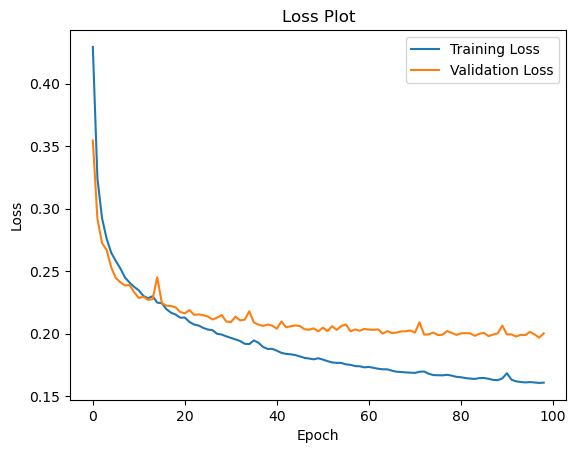

In [29]:
plt.figure()
plt.plot(Accuracy_model.history['loss'], label='Training Loss')
plt.plot(Accuracy_model.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [41]:
M_hat = model.predict(padded_vx, batch_size=10)   
S_hat =np.multiply(M_hat, padded_VX_cmplx)  
S_hat = np.transpose(S_hat, (0, 2, 1))
s_hat = librosa.istft(S_hat, win_length=1024, hop_length=512)
padded_vs = padded_vs[:, 0:len(s_hat[0])]

num = np.sum(np.square(padded_vs), axis=1)
den = np.sum(np.square(padded_vs - s_hat), axis=1)
snr = 10 * np.log10(num / den)
print('Average value of SNR is:', np.mean(snr))

120/120 [==============================] - 34s 281ms/step
Average value of SNR is: 11.469873


In [42]:
M_hat = model.predict(padded_tex, batch_size=10)   
S_hat =np.multiply(M_hat, padded_TEX_cmplx)  
S_hat = np.transpose(S_hat, (0, 2, 1))
s_hat = librosa.istft(S_hat, win_length=1024, hop_length=512)  

40/40 [==============================] - 13s 309ms/step


In [ ]:
directory = 'timit-homework/te/'
directory1 = 'timit-homework/te_hat/'

for i in range(400):
    filename = f'tex{i:04d}.wav' 
    file_path = directory + filename 
    s, sr = librosa.load(file_path, sr=None)
    s_hat_1 = s_hat[i][:len(s)]
    filename1 = f'tex_hat{i:04d}.wav' 
    file_path1 = directory1 + filename1 
    sf.write(file_path1, s_hat_1, sr)